In [216]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [217]:
#Train and Test Dataset 
adult_df = pd.read_csv(r'/content/train.csv',delimiter=';')

adult_df_test = pd.read_csv(r'/content/test.csv',delimiter=';')

adult_df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [218]:
adult_df.shape

(45211, 17)

In [219]:
adult_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Pre processing the data**

In [130]:
adult_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [220]:
adult_df.isnull().sum()
adult_df_test.isnull().sum()
# adult_df.replace(np.nan,0,inplace=True)
# adult_df.dropna(axis=1,inplace=True)
# adult_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [222]:
#Unique for Train Dataset
for i in adult_df.columns:
    print({i:adult_df[i].unique()})

{'age': array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])}
{'job': array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)}
{'marital': array(['married', 'single', 'divorced'], dtype=object)}
{'education': array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)}
{'default': array(['no', 'yes'], dtype=object)}
{'balance': array([ 2143,    29,     2, ...,  8205, 14204, 16353])}
{'housing': array(['yes', 'no'], dtype=object)}
{'loan': array(['no', 'yes'], dtype=object)}
{'contact': array(['unknown', 'cellular', 'telephone'], dtype=object)}
{'day': arra

In [223]:
#Unique for test Dataset
for i in adult_df_test.columns:
    print({i:adult_df_test[i].unique()})

{'age': array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
       26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
       51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
       62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84])}
{'job': array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)}
{'marital': array(['married', 'single', 'divorced'], dtype=object)}
{'education': array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)}
{'default': array(['no', 'yes'], dtype=object)}
{'balance': array([ 1787,  4789,  1350, ...,  -333, -3313,  1137])}
{'housing': array(['no', 'yes'], dtype=object)}
{'loan': array(['no', 'yes'], dtype=object)}
{'contact': array(['cellular', 'unknown', 'telephone'], dtype=object)}
{'day': array([19, 11, 16,  3,  5, 23, 14,  6, 17, 20, 13, 

In [224]:
adult_df.replace('unknown',np.nan,inplace=True)
adult_df_test.replace('unknown',np.nan,inplace=True)

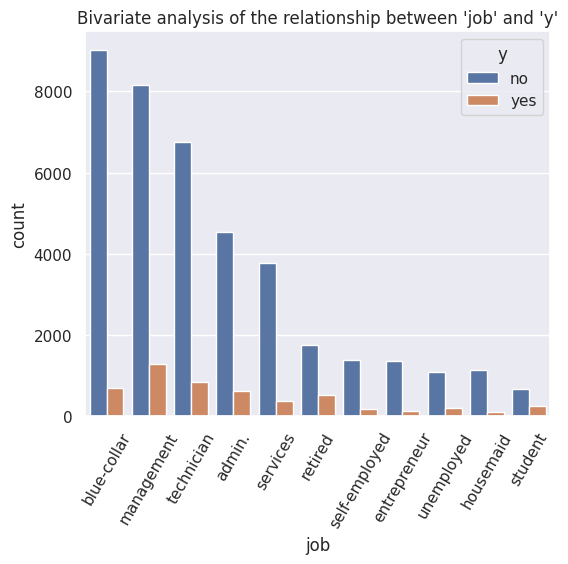

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
job = sns.countplot(x="job", data = adult_df, hue = "y", order = adult_df["job"].value_counts().index)
job.tick_params(axis='x', rotation=60)
plt.title("Bivariate analysis of the relationship between 'job' and 'y'")
plt.show()

In [226]:
adult_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

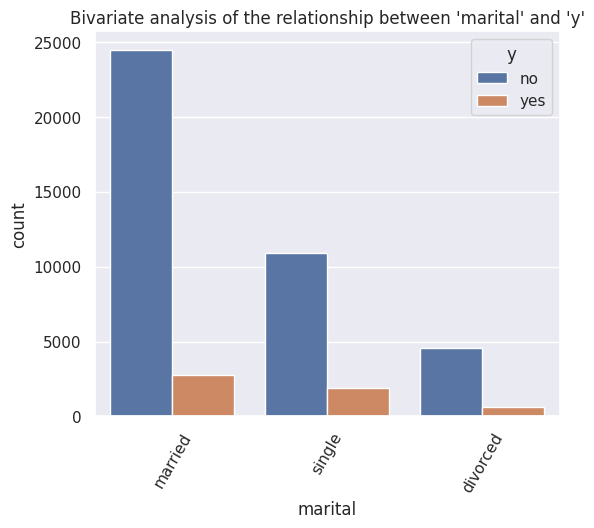

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
job = sns.countplot(x="marital", data = adult_df, hue = 'y', order = adult_df["marital"].value_counts().index)
job.tick_params(axis='x', rotation=60)
plt.title("Bivariate analysis of the relationship between 'marital' and 'y'")
plt.show()

In [228]:
adult_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

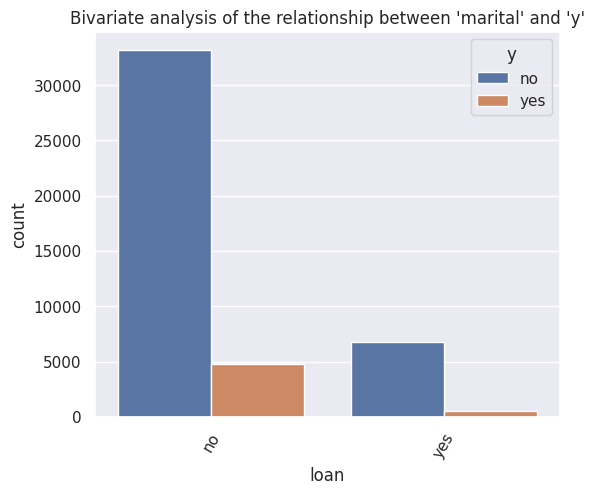

In [229]:
job = sns.countplot(x="loan", data = adult_df, hue = 'y', order = adult_df["loan"].value_counts().index)
job.tick_params(axis='x', rotation=60)
plt.title("Bivariate analysis of the relationship between 'marital' and 'y'")
plt.show()

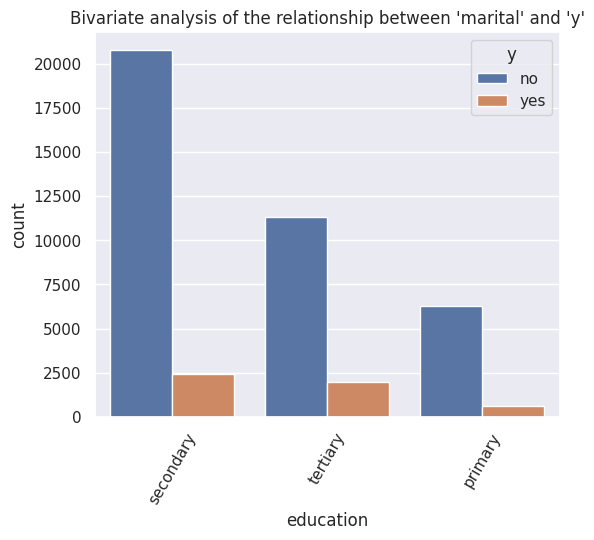

In [139]:
job = sns.countplot(x="education", data = adult_df, hue = 'y', order = adult_df["education"].value_counts().index)
job.tick_params(axis='x', rotation=60)
plt.title("Bivariate analysis of the relationship between 'marital' and 'y'")
plt.show()

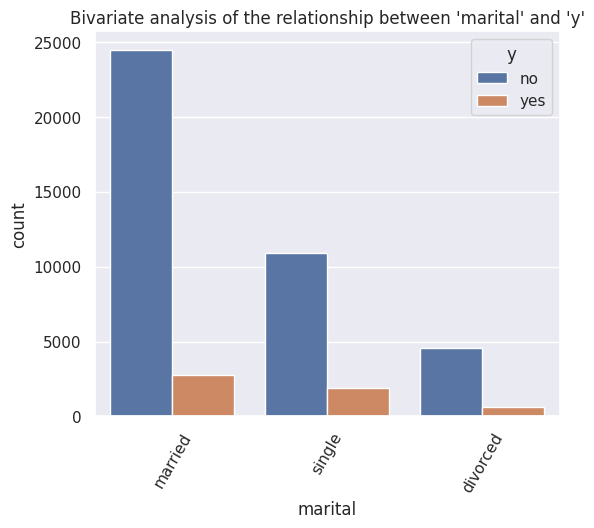

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_theme(style='darkgrid')
# sns.set(rc = {'figure.figsize':(6, 5)})
job = sns.countplot(x="marital", data = adult_df, hue = 'y', order = adult_df["marital"].value_counts().index)
job.tick_params(axis='x', rotation=60)
plt.title("Bivariate analysis of the relationship between 'marital' and 'y'")
plt.show()

In [230]:
for col in adult_df_test.columns:
  if adult_df_test[col].dtype=='object':
      mode_val = adult_df_test[col].mode().iloc[0]  # calculate mode value
      adult_df_test[col] = adult_df_test[col].fillna(mode_val)

In [231]:
for col in adult_df.columns:
  if adult_df[col].dtype=='object':
      mode_val = adult_df[col].mode().iloc[0]  # calculate mode value
      adult_df[col] = adult_df[col].fillna(mode_val)

In [184]:
adult_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [143]:
"""
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':
        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)
    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':
        adult_df_rev[x].fillna(round(adult_df_rev[x].mean()),inplace=True)
"""

"\nfor x in adult_df_rev.columns:\n    if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':\n        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)\n    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':\n        adult_df_rev[x].fillna(round(adult_df_rev[x].mean()),inplace=True)\n"

In [232]:
for x in adult_df.columns:
    if adult_df[x].dtype=='object' or adult_df[x].dtype=='bool':
      print(adult_df[x].value_counts())

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     42305
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
failure    41860
other       1840
success     1511
Name: poutcome, dtype: int64
no     39922
yes     5289
Name: y, dtype: int64


# Dummy variables using pd.LabelEncoder()

In [233]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in adult_df_test.columns:
  if adult_df_test[x].dtypes=='object':
     adult_df_test[x]=le.fit_transform(adult_df_test[x])
    # """
    # le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    # print('Feature', x)
    # print('mapping', le_name_mapping)
    # """

In [234]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in adult_df.columns:
  if adult_df[x].dtypes=='object':
     adult_df[x]=le.fit_transform(adult_df[x])
    # """
    # le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    # print('Feature', x)
    # print('mapping', le_name_mapping)
    # """

In [235]:
adult_df.head()

#0--> <=50K
#1--> >50K

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,0,5,8,261,1,-1,0,0,0
1,44,9,2,1,0,29,1,0,0,5,8,151,1,-1,0,0,0
2,33,2,1,1,0,2,1,1,0,5,8,76,1,-1,0,0,0
3,47,1,1,1,0,1506,1,0,0,5,8,92,1,-1,0,0,0
4,33,1,2,1,0,1,0,0,0,5,8,198,1,-1,0,0,0


In [236]:
adult_df.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [57]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
adult_df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
y            int64
dtype: object

In [ ]:
"""
Preprocessing of data:
1. Feature selection
2. Handling missing values [Mandatory]

Converting categorical values to numerical[Mandatory]
1.Manual encoding-->map()
df["Smoker"]=df["Smoker"].map({"yes":1,"no":0})

2.Create dummy variables-->pd.get_dummies(), OneHotEncoder()
Gender-->F,M,U
Gender_F	Gender_M	Gender_U
1		0		0
0		1		0
0		0		1

3.Creating levels-->LabelEncoder()
a. Identify the unique values present in the variable
b. Create a dictionary object into the memory with the unique values as the keys and map the labels to the keys in ascending alphabetical order
	{"Private":2
	"Self-emp":3
	"Local-gov":1
	"Fed-gov":0
	}
c. Map the values into the actual variable and transform it.
2
2
0
2
1
"""

'\nPreprocessing of data:\n1. Feature selection\n2. Handling missing values [Mandatory]\n\nConverting categorical values to numerical[Mandatory]\n1.Manual encoding-->map()\ndf["Smoker"]=df["Smoker"].map({"yes":1,"no":0})\n\n2.Create dummy variables-->pd.get_dummies(), OneHotEncoder()\nGender-->F,M,U\nGender_F\tGender_M\tGender_U\n1\t\t0\t\t0\n0\t\t1\t\t0\n0\t\t0\t\t1\n\n3.Creating levels-->LabelEncoder()\na. Identify the unique values present in the variable\nb. Create a dictionary object into the memory with the unique values as the keys and map the labels to the keys in ascending alphabetical order\n\t{"Private":2\n\t"Self-emp":3\n\t"Local-gov":1\n\t"Fed-gov":0\n\t}\nc. Map the values into the actual variable and transform it.\n2\n2\n0\n2\n1\n'

In [253]:
X = adult_df.drop(columns=['y'], axis=1)

Y = adult_df['y']


In [255]:
X_t = adult_df_test.drop(columns=['y'], axis=1)

Y_t = adult_df_test['y']

In [256]:
adult_df_test['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

In [257]:
print(X.shape)
print(Y.shape)
print(X_t.shape)
print(Y_t.shape)

(45211, 16)
(45211,)
(4521, 16)
(4521,)


In [258]:
from collections import Counter 
from imblearn.under_sampling import NearMiss

# Instantiate the NearMiss estimator with a sampling strategy of 0.8
us = NearMiss(sampling_strategy=0.8)

# Fit the estimator to the input data X and target Y, and transform the data
X_resampled_t, Y_resampled_t = us.fit_resample(X_t, Y_t)

# Print the number of instances in each class before and after resampling
print('Original dataset shape %s' % Counter(Y_t))
print('Resampled dataset shape %s' % Counter(Y_resampled_t))



Original dataset shape Counter({0: 4000, 1: 521})
Resampled dataset shape Counter({0: 651, 1: 521})


In [259]:
from collections import Counter 
from imblearn.under_sampling import NearMiss

# Instantiate the NearMiss estimator with a sampling strategy of 0.8
us = NearMiss(sampling_strategy=0.8)

# Fit the estimator to the input data X and target Y, and transform the data
X_resampled, Y_resampled = us.fit_resample(X, Y)

# Print the number of instances in each class before and after resampling
print('Original dataset shape %s' % Counter(Y))
print('Resampled dataset shape %s' % Counter(Y_resampled))



Original dataset shape Counter({0: 39922, 1: 5289})
Resampled dataset shape Counter({0: 6611, 1: 5289})


In [244]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_resampled)
X = scaler.transform(X_resampled)
#X=scaler.fit_transform(X)
#print(X)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_resampled)
X_t = scaler.transform(X_resampled_t)
#X=scaler.fit_transform(X)
#print(X)

In [245]:
print(adult_df_test)

      age  job  marital  education  default  balance  housing  loan  contact  \
0      30   10        1          0        0     1787        0     0        0   
1      33    7        1          1        0     4789        1     1        0   
2      35    4        2          2        0     1350        1     0        0   
3      30    4        1          2        0     1476        1     1        0   
4      59    1        1          1        0        0        1     0        0   
...   ...  ...      ...        ...      ...      ...      ...   ...      ...   
4516   33    7        1          1        0     -333        1     0        0   
4517   57    6        1          2        1    -3313        1     1        0   
4518   57    9        1          1        0      295        0     0        0   
4519   28    1        1          1        0     1137        0     0        0   
4520   44    2        2          2        0     1136        1     1        0   

      day  month  duration  campaign  p

In [ ]:
#np.set_printoptions(threshold=np.inf)

In [246]:
Y=Y_resampled.astype(int)
Y_t=Y_resampled_t.astype(int)

**Running a basic model**

In [260]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=10)  


In [261]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(31647, 16)
(31647,)
(13564, 16)
(13564,)


In [262]:
from sklearn.model_selection import StratifiedKFold


In [263]:
from sklearn.ensemble import RandomForestClassifier  # for classification
classifier = RandomForestClassifier(max_depth=None, max_features='log2', n_estimators=200)

#fitting training data to the model
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
print(Y_pred)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[0 0 1 ... 0 0 0]
[[11659   347]
 [  912   646]]
Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12006
           1       0.65      0.41      0.51      1558

    accuracy                           0.91     13564
   macro avg       0.79      0.69      0.73     13564
weighted avg       0.90      0.91      0.90     13564

Accuracy of the model:  0.9071807726334414


In [264]:
# defining the classifier

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
     
model = RandomForestClassifier()
# creating a dic for the grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, None],
    'max_features': ['sqrt', 'log2']
}

# defining the CV
cv = StratifiedKFold(n_splits=5)
# initializing the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1,cv=cv,scoring='f1_weighted')
# estimator===model used(random forest,Linear etc)
# para=parameters used 
# cv=StratifiedKFold(n_splits=5)
# scoring='f1_weighted'
# training the model on grid search for hyperparameter tuning of Adaboost
grid_result = grid_search.fit(X_train,Y_train)

# finding the best results /hyperparameter tuning of Adaboost
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.890497 using {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}


In [265]:
Y_pred=classifier.predict(X_t)
print(Y_pred)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_t,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_t,Y_pred))

acc=accuracy_score(Y_t,Y_pred)
print("Accuracy of the model: ",acc)

[0 0 0 ... 0 0 0]
[[3969   31]
 [  94  427]]
Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4000
           1       0.93      0.82      0.87       521

    accuracy                           0.97      4521
   macro avg       0.95      0.91      0.93      4521
weighted avg       0.97      0.97      0.97      4521

Accuracy of the model:  0.9723512497235125


In [159]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[1 1 0 ... 1 0 1]
[[1867  135]
 [ 284 1284]]
Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2002
           1       0.90      0.82      0.86      1568

    accuracy                           0.88      3570
   macro avg       0.89      0.88      0.88      3570
weighted avg       0.88      0.88      0.88      3570

Accuracy of the model:  0.8826330532212885


[[1886  116]
 [ 200 1368]]
Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2002
           1       0.92      0.87      0.90      1568

    accuracy                           0.91      3570
   macro avg       0.91      0.91      0.91      3570
weighted avg       0.91      0.91      0.91      3570

Accuracy of the model:  0.911484593837535


**Adjusting the threshold**

In [100]:
# store the predicted probabilities
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[6.04849504e-13 1.00000000e+00]
 [4.30601013e-02 9.56939899e-01]
 [8.74315167e-01 1.25684833e-01]
 ...
 [8.50319307e-02 9.14968069e-01]
 [9.85314606e-01 1.46853942e-02]
 [3.96882884e-05 9.99960312e-01]]


In [102]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.4:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
#print(y_pred_class)

In [104]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test, y_pred_class))

[[1805  197]
 [ 235 1333]]
Accuracy of the model:  0.8789915966386554
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2002
           1       0.87      0.85      0.86      1568

    accuracy                           0.88      3570
   macro avg       0.88      0.88      0.88      3570
weighted avg       0.88      0.88      0.88      3570



In [101]:
for a in np.arange(0.4,0.8,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 432  , type 2 error : 235  , type 1 error: 197
Errors at threshold  0.41000000000000003 : 429  , type 2 error : 236  , type 1 error: 193
Errors at threshold  0.42000000000000004 : 427  , type 2 error : 243  , type 1 error: 184
Errors at threshold  0.43000000000000005 : 430  , type 2 error : 252  , type 1 error: 178
Errors at threshold  0.44000000000000006 : 432  , type 2 error : 261  , type 1 error: 171
Errors at threshold  0.45000000000000007 : 435  , type 2 error : 267  , type 1 error: 168
Errors at threshold  0.4600000000000001 : 427  , type 2 error : 270  , type 1 error: 157
Errors at threshold  0.4700000000000001 : 422  , type 2 error : 272  , type 1 error: 150
Errors at threshold  0.4800000000000001 : 418  , type 2 error : 274  , type 1 error: 144
Errors at threshold  0.4900000000000001 : 420  , type 2 error : 280  , type 1 error: 140
Errors at threshold  0.5000000000000001 : 419  , type 2 error : 284  , type 1 error: 135
Errors at threshold  0.51000000